In [1]:
from cuqi.distribution import UserDefinedDistribution, Gaussian
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
from cuqi.model import LinearModel
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS

import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the module
from utilities import TableAutomization as TA
from cuqi.distribution import Distribution



In [2]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)


In [3]:
specific =  np.array([1.5,1.5 ])

In [4]:
BP = BayesianProblem(b, x)
bb = b(x = specific).sample()
BP.set_data(b=bb)

BayesianProblem with target: 
 Posterior(
    Equation:
	 p(x|b) ∝ L(x|b)p(x)
    Densities:
	b ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )

In [5]:
target_simplest = BP.posterior

In [6]:
df , (fig, axs) = TA.create_comparison(target_simplest, [0.05, 0.05, 0.065, 0.065, 0.05 ], [10000, 8500, 10000, 10000, 1000],[0, 1500, 0, 5000, 100])

Sample 10000 / 10000

Average acceptance rate: 0.9241 

Sample 10000 / 10000

Average acceptance rate: 0.564 MCMC scale: 0.5507028833252701 

Sample 10000 / 10000
Sample 15000 / 15000
Sample 1100 / 1100


In [7]:
TA.print_table(df)

+------------+---------+----------+-------+---------+---------+-------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  | LogPDF | Gradient |
+------------+---------+----------+-------+---------+---------+-------+--------+----------+
|  MH_fixed  |  10000  |    0     |  0.05 |  6.952  |  6.958  | 0.924 | 20000  |    0     |
| MH_adapted |   8500  |   1500   |  0.05 |  25.785 |  26.044 | 0.564 | 20000  |    0     |
|    ULA     |  10000  |    0     | 0.065 |  66.107 |  67.505 |  1.0  | 20000  |  20000   |
|    MALA    |  10000  |   5000   | 0.065 |  61.927 |  62.517 |  0.88 | 30000  |  30000   |
|    NUTS    |   1000  |   100    |  0.05 | 118.311 | 115.785 | 0.904 | 14176  |  14176   |
+------------+---------+----------+-------+---------+---------+-------+--------+----------+


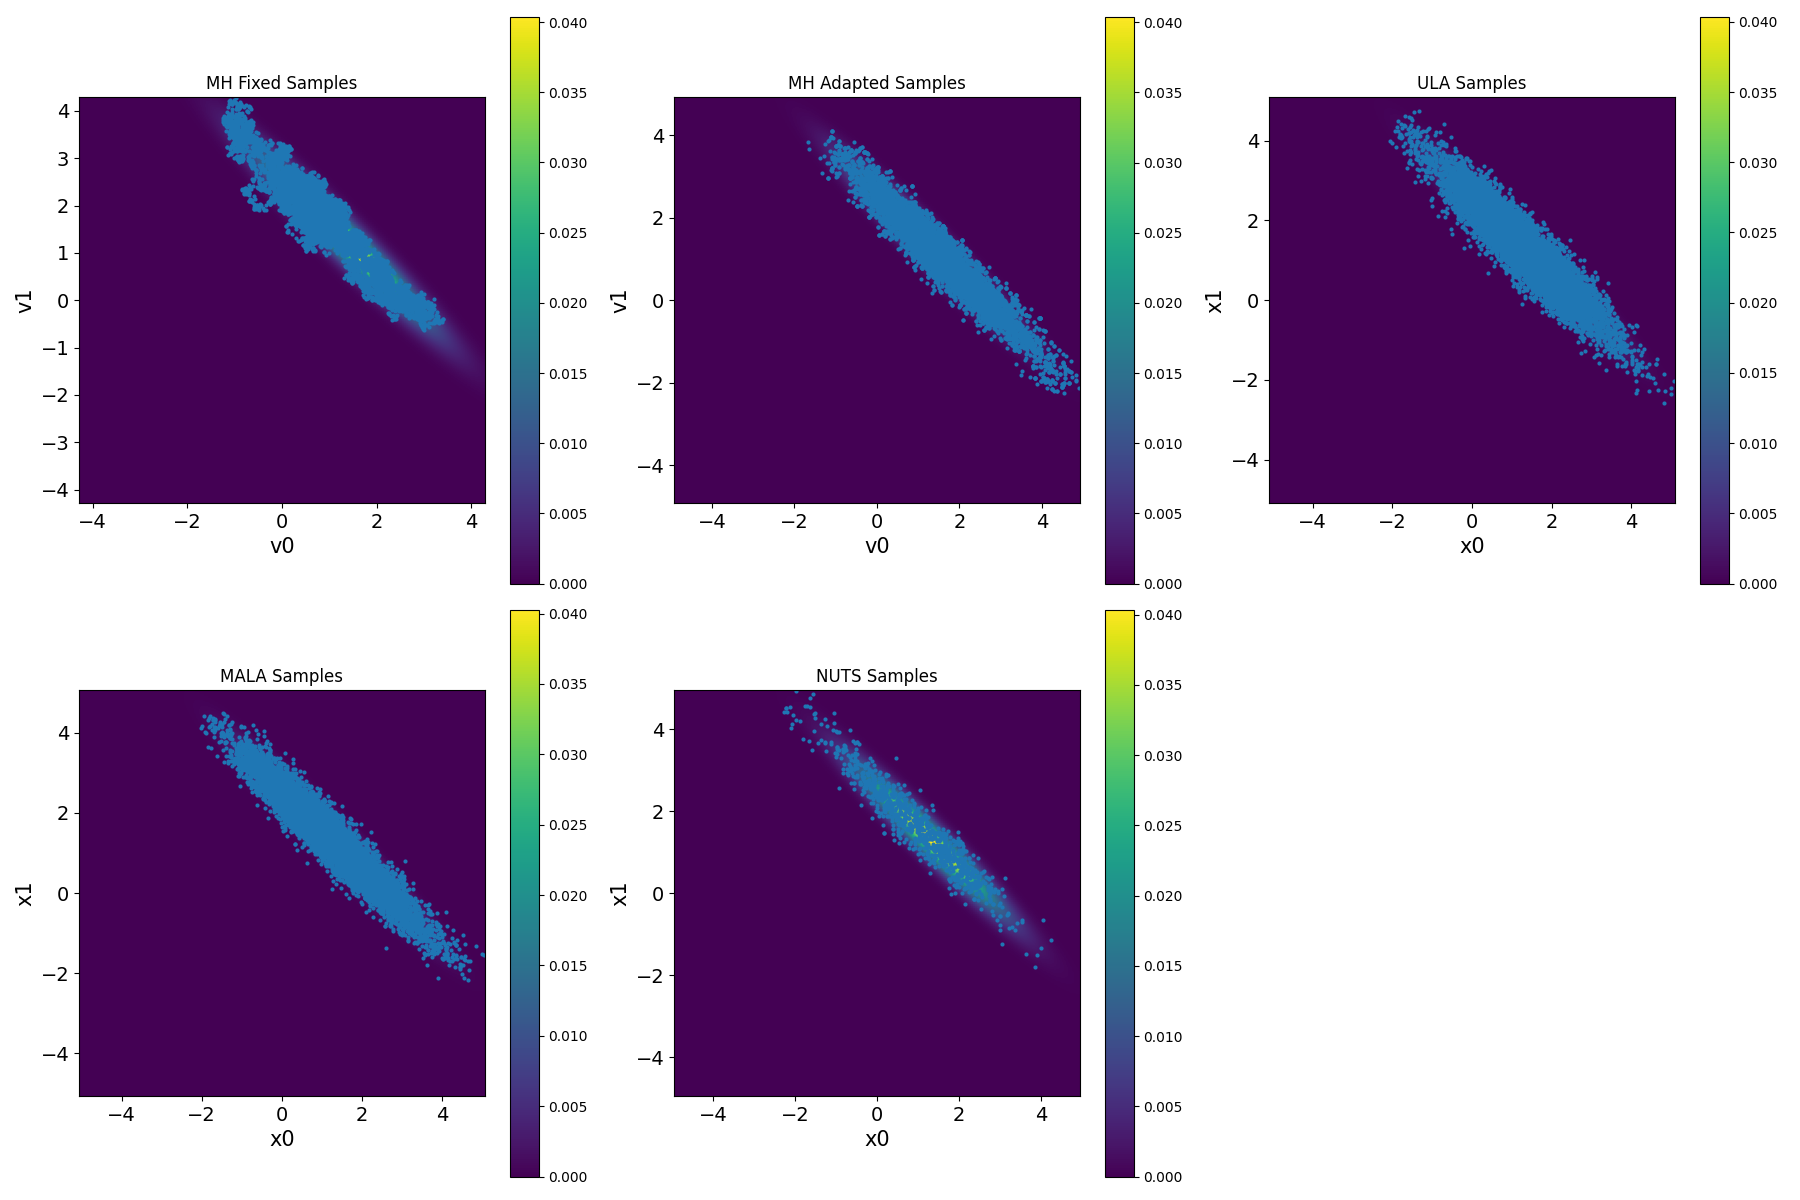

In [8]:
TA.show_plot(fig)

In [9]:
df, (fig, axs) = TA.create_comparison(target_simplest, 0.05, 8500, 1500, seed = 12,chains=2)

Sample 10000 / 10000

Average acceptance rate: 0.928 

Sample 10000 / 10000

Average acceptance rate: 0.5615294117647058 MCMC scale: 0.5507300604348057 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


In [10]:
TA.print_table(df)

+------------+---------+----------+-------+----------+---------+-------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0)  | ESS(v1) |   AR  | LogPDF | Gradient |
+------------+---------+----------+-------+----------+---------+-------+--------+----------+
|  MH_fixed  |   8500  |   1500   |  0.05 |  9.141   |  8.434  | 0.928 | 20000  |    0     |
| MH_adapted |   8500  |   1500   |  0.05 |  53.193  |  54.442 | 0.562 | 20000  |    0     |
|    ULA     |   8500  |   1500   |  0.05 |  51.691  |  50.114 |  1.0  | 20000  |  20000   |
|    MALA    |   8500  |   1500   |  0.05 |  52.22   |  52.389 | 0.919 | 20000  |  20000   |
|    NUTS    |   8500  |   1500   |  0.05 | 1660.352 | 1632.53 | 0.769 | 109888 |  109888  |
+------------+---------+----------+-------+----------+---------+-------+--------+----------+


In [ ]:
TA.show_plot(fig)